In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2.9.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Построение модели

In [5]:
# Определение слоев
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(32, activation='elu'),
    keras.layers.Dropout(0.025),
    keras.layers.Dense(16, activation='elu'),
    keras.layers.Dense(10)
])

In [6]:
# Компиляция модели
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Тренировка

In [7]:
# Передача данных в модель
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5379 - accuracy: 0.8053
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4121 - accuracy: 0.8487
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3743 - accuracy: 0.8624
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3535 - accuracy: 0.8714
Epoch 5/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3380 - accuracy: 0.8747
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3258 - accuracy: 0.8792
Epoch 7/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3172 - accuracy: 0.8824
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.8883
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2956 - accuracy: 0.8911
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.289

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3188 - accuracy: 0.8891 - 772ms/epoch - 2ms/step


In [9]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [10]:
predictions = probability_model.predict(test_images)
predictions[4]

313/313 [==============================] - 1s 2ms/step


array([8.1677049e-02, 1.8036611e-04, 1.3972948e-02, 4.4188331e-04,
       4.5538397e-04, 4.9145598e-07, 9.0326852e-01, 1.6797845e-12,
       3.3498168e-06, 1.6166725e-08], dtype=float32)

In [11]:
np.argmax(predictions[4])

6

In [12]:
test_labels[4]

6

In [13]:
img = test_images[1]

print(img.shape)

(28, 28)


In [14]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [15]:
predictions_single = probability_model.predict(test_images[:3])

print(np.argmax(predictions_single[0]))

1/1 [==============================] - 0s 20ms/step
9


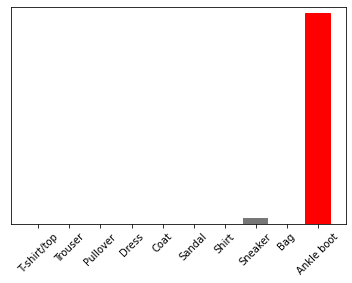

In [16]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Мои действия:

Поэкспериментировал с различными моделями и следил за точностью.

1) увеличивал $epochs$ до 10-20

2) количество нейронов в скрытых слоях и количество скрытых слоев

3) слои $Dropout$ с разными процентами выброшенных при вычислениях данных


В итоге увеличил количество эпох до 15. 

Скрытых слоев: 4

Переобучение сдерживал 3 слоями Дропаута.

Тестовая метрика: 0.889

Разница между трейном и тестом: 1.5%